In [29]:
import pandas as pd
import numpy as np
import re
import joblib
import pickle
from sklearn import model_selection
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,recall_score,precision_score
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image
import seaborn as sns

#load data
df = pd.read_csv('text_preprocessing/final_dataset.csv')
df

,Sentiment,tweet_tokens_stemmed
0,positive,"['undang', 'shanijkt', 'hitamputih', 'pemenang..."
1,positive,"['selamat', 'berbuka', 'puasa', 'semoga', 'ama..."
2,positive,"['trans', 'hitam', 'putih', 'penghargaan', 'no..."
3,positive,"['selamat', 'hitamputih']"
4,positive,"['asiknya', 'nonton', 'hitam', 'putih', 'trans']"
...,...,...
395,negative,"['banget', 'kesel', 'debat', 'pake', 'emosi', ..."
396,negative,"['miskin', 'miskin', 'sekolah', 'pungutan', 'l..."
397,negative,"['emosi', 'cepat', 'tua', 'nonton', 'emosi', '..."
398,negative,"['penampilan', 'kyk', 'preman', 'taunya', 'bki..."


index: Index(['positive', 'negative'], dtype='object', name='Sentiment')
values: [200 200]
all_values: 400


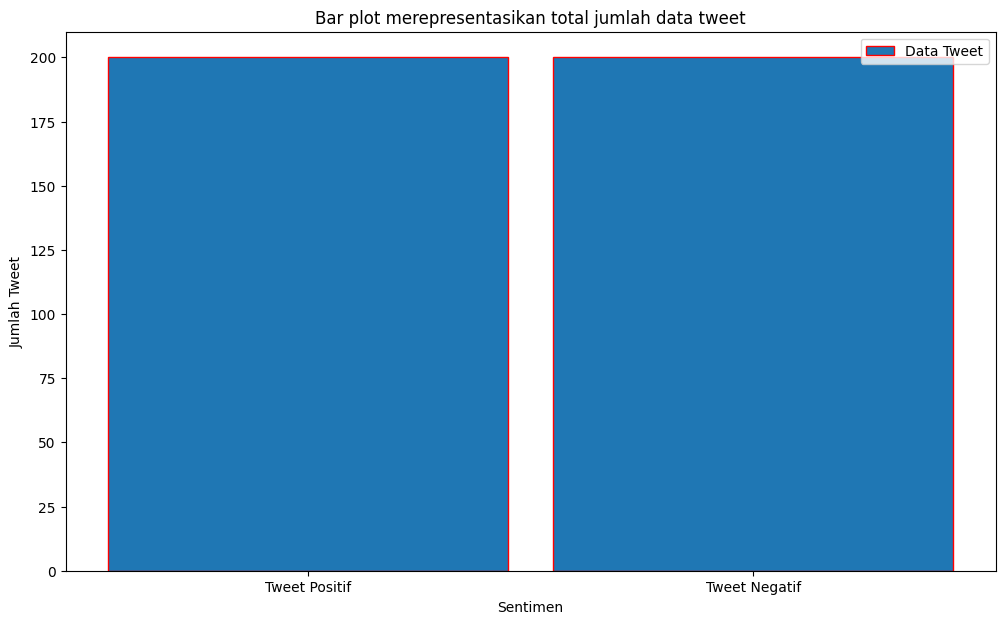

In [2]:
#visualisasi data
tweet_bar_df = df['Sentiment'].value_counts()
print(f'index: {tweet_bar_df.index}')
print(f'values: {tweet_bar_df.values}')
print(f'all_values: {tweet_bar_df.sum()}')

plt.figure(figsize=(12, 7))
sentimen = ['Tweet Positif', 'Tweet Negatif']
plt.bar(sentimen, tweet_bar_df.values, align='center',  edgecolor = 'red', width= 0.9)
i = 1.0
j = 30
for i in range(len(sentimen)):
    plt.annotate(tweet_bar_df.values[i], (-0.1 + i, tweet_bar_df.values[i] + j))
plt.legend(labels = ['Data Tweet'])
plt.title("Bar plot merepresentasikan total jumlah data tweet")
plt.xlabel('Sentimen')
plt.ylabel('Jumlah Tweet')
plt.show()

In [3]:
#konversi sentimen positif =1 negatif= 0
def convert_label_sentimen(label_sentimen):
    if label_sentimen == "positive":
        return 1
    else:
        return 0

df['label_sentimen'] = df['Sentiment'].apply(convert_label_sentimen)
df.shape

(400, 3)

In [4]:
df.drop(df.columns[[0]], axis= 1,inplace=True)
df

,tweet_tokens_stemmed,label_sentimen
0,"['undang', 'shanijkt', 'hitamputih', 'pemenang...",1
1,"['selamat', 'berbuka', 'puasa', 'semoga', 'ama...",1
2,"['trans', 'hitam', 'putih', 'penghargaan', 'no...",1
3,"['selamat', 'hitamputih']",1
4,"['asiknya', 'nonton', 'hitam', 'putih', 'trans']",1
...,...,...
395,"['banget', 'kesel', 'debat', 'pake', 'emosi', ...",0
396,"['miskin', 'miskin', 'sekolah', 'pungutan', 'l...",0
397,"['emosi', 'cepat', 'tua', 'nonton', 'emosi', '...",0
398,"['penampilan', 'kyk', 'preman', 'taunya', 'bki...",0


In [5]:
df['label_sentimen'].value_counts()

label_sentimen
1    200
0    200
Name: count, dtype: int64

In [22]:
X= df['tweet_tokens_stemmed'] 
y= df['label_sentimen']
#k-fold cross validation(spliting data)
kfold = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
for train_idx, val_idx in kfold.split(X, y):
    X_train, X_test = X[train_idx], X[val_idx]
    y_train, y_test = y[train_idx], y[val_idx]
    
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((360,), (40,), (360,), (40,))

In [23]:
  # Vektorisasi text menggunakan TF-IDF
tfidf_model = TfidfVectorizer(smooth_idf=False).fit(X_train)
X_train = tfidf_model.transform(X_train)
X_test = tfidf_model.transform(X_test)

print(X_train,X_test)

  (0, 1114)	0.47321142314648934
  (0, 1003)	0.3198235856308025
  (0, 974)	0.3198235856308025
  (0, 865)	0.3198235856308025
  (0, 803)	0.3198235856308025
  (0, 697)	0.3198235856308025
  (0, 528)	0.3198235856308025
  (0, 411)	0.3198235856308025
  (0, 356)	0.24507359613689872
  (1, 953)	0.24864114359860165
  (1, 946)	0.3046825670418109
  (1, 871)	0.38148153826807
  (1, 361)	0.38148153826807
  (1, 264)	0.38148153826807
  (1, 114)	0.38148153826807
  (1, 27)	0.38148153826807
  (1, 26)	0.34308205265494046
  (2, 1090)	0.33363281485538665
  (2, 878)	0.29705136250828995
  (2, 821)	0.5980428152694774
  (2, 748)	0.5980428152694774
  (2, 355)	0.2917862489781778
  (3, 946)	0.7215938386007008
  (3, 356)	0.6923166414968701
  (4, 1090)	0.3884684836429908
  :	:
  (355, 482)	0.43648213476012365
  (355, 324)	0.43648213476012365
  (355, 287)	0.4593134857782089
  (355, 212)	0.39206927169665445
  (355, 71)	0.31711383797505793
  (356, 944)	0.37888233696313756
  (356, 876)	0.4212887722012922
  (356, 695)	0.708

In [8]:
#klasifikasi
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
predict = mnb.predict(X_test)
print(predict)

[1 1 1 1 1 0 0 1 1 1 1 0 0 0 0 1 0 0 0 1 1 1 1 0 1 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 0]


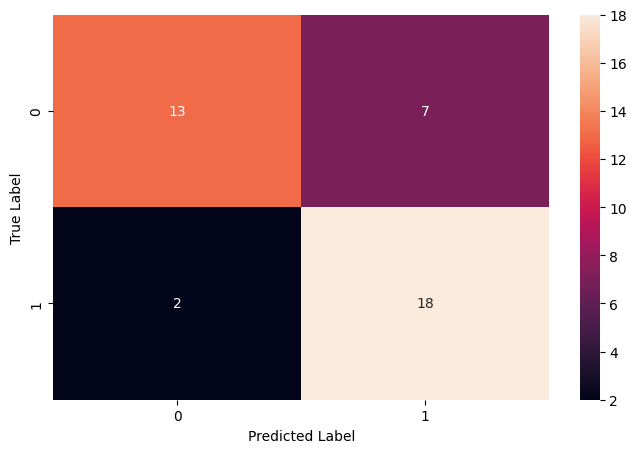

In [10]:
#confusion matrix model
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, predict), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [25]:
#skor akurasi model
print('Hasil akurasi model : ')
print(accuracy_score(y_test, predict)*100)

Hasil akurasi model : 
77.5


BERNOULLI NAIVE BAYES

In [ ]:
#klasifikasi
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
predict = bnb.predict(X_test)
print(predict)

[1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 0 0 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 0
 1 1 0]


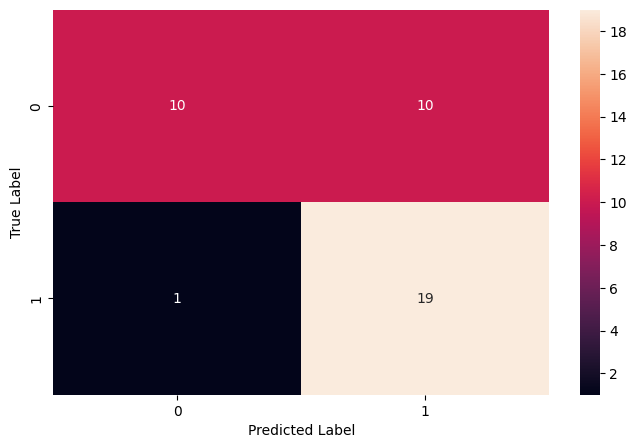

In [ ]:
#confusion matrix model
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, predict), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
#skor akurasi model
print('Hasil akurasi model : ')
print(accuracy_score(y_test, predict)*100)

Hasil akurasi model : 
72.5


GAUSSIAN NAIVE BAYES

In [ ]:
#klasifikasi
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()
gnb = GaussianNB()
gnb.fit(X_train_dense, y_train)
predict = gnb.predict(X_test_dense)
print(predict)

[1 1 1 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1
 1 1 0]


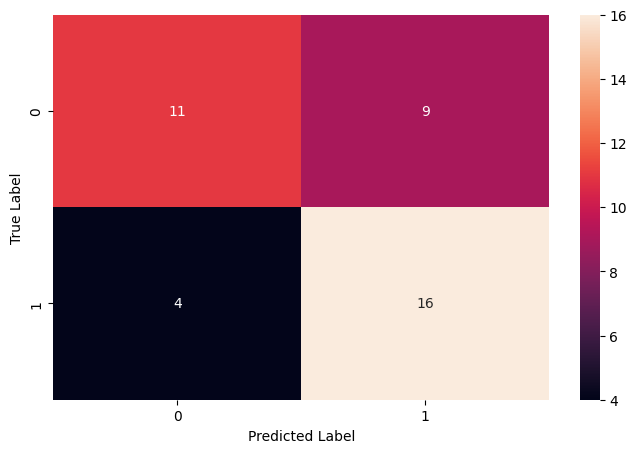

In [ ]:
#confusion matrix model
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, predict), annot=True, fmt=".0f", ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
#skor akurasi model
print('Hasil akurasi model : ')
print(accuracy_score(y_test, predict)*100)

Hasil akurasi model : 
67.5
